In [1]:
import os
import time
import random
import collections

import gym
from gym import wrappers
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [2]:
from architecture.td3 import TD3
from architecture.ddpg import DDPG
from architecture.dqn import DQN

In [3]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

def live_plot(data_dict, figsize=(15,5)):

    clear_output(wait=True)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    
    for label, data in data_dict.items():
        ax.plot(data, label=label)
    
    ax.legend(loc='lower left')
    
    return ax
    

---

##### Environment

In [4]:
env_name = 'LunarLanderContinuous-v2'
#env_name = 'LunarLander-v2'

##### Initialize environment and set seeds

In [5]:
env = gym.make(env_name)

In [6]:
state_dim = env.observation_space.shape[0]

try:
    action_dim = env.action_space.shape[0]
    max_action = float(env.action_space.high[0])
except:
    action_dim = env.action_space.n

##### Choose saved model

In [7]:
os.listdir('./pytorch_models')

['all_ddpg',
 'all_dqn',
 'all_td3',
 'DDPG_LunarLanderContinuous-v2_202_actor.pth',
 'DDPG_LunarLanderContinuous-v2_202_critic.pth',
 'DQN_LunarLander-v2_11_value_fn.pth',
 'TD3_LunarLanderContinuous-v2_1_actor.pth',
 'TD3_LunarLanderContinuous-v2_1_critic_1.pth',
 'TD3_LunarLanderContinuous-v2_1_critic_2.pth']

In [8]:
file_name = (
    'TD3_LunarLanderContinuous-v2_1'
    #'DDPG_LunarLanderContinuous-v2_202'
    #'DQN_LunarLander-v2_11'
)

file_name

'TD3_LunarLanderContinuous-v2_1'

##### Initialize agent

In [9]:
agent = TD3(state_dim, action_dim, max_action)
#agent = DDPG(state_dim, action_dim, max_action)
#agent = DQN(state_dim, action_dim)

agent.load(file_name, './pytorch_models')

##### Define testing parameters

In [10]:
max_steps = 1000
episodes = 100

report = 1
show = 5

reward_trace = collections.defaultdict(list)

##### Testing:

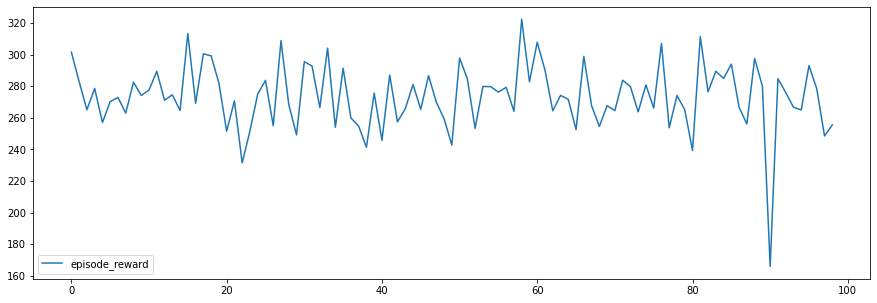

Episode: 99
Average score: 255.43521759546263


In [11]:
for episode in np.arange(1, episodes):             
    
    obs = env.reset()
    done = False
    episode_reward = []
    steps = 0
    
    
    
    while not done:      
        
        if episode % show == 0:
            env.render()
        
        action = agent.select_action(np.array(obs))
                
        new_obs, reward, done, info = env.step(action)
        
        done = (done) or (steps >= max_steps)
        
        episode_reward.append(reward)
        
        obs = new_obs
        steps += 1


    
    reward_trace['episode_reward'].append(sum(episode_reward))
    ax = live_plot(reward_trace)
    plt.show() 
    
    if episode % report == 0:
        
        print('Episode:', episode)
        print('Average score:', np.mean(reward_trace['episode_reward'][-report:]))
        time.sleep(0.5)
        
    